In [586]:
import eventDrivenSimulation as eds
import simpy
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import show as sh
import requests
import folium
import haversine
import math
import bibliothek as bib
import random
import simulation as sm
import statistics
from tabulate import tabulate

#### Load the data

In [587]:
#scheduling='pf-resback'
scheduling='pf'
#cluster=[]

file7='PRB_Simulation_133_320/prb_range.npy'
file8='PRB_Simulation_133_320/mu_range.npy'
file9='PRB_Simulation_133_320/prb_number_mode12.npy'
if(scheduling=='pf_2'):
    file1='PRB_Simulation_133_320_2/mean_rate_Gain_pf.npy'
    file2='PRB_Simulation_133_320_2/fainress_noCoMP_pf.npy'
    file3='PRB_Simulation_133_320_2/fainress_CoMP_pf.npy'
    file4='PRB_Simulation_133_320_2/Gain_std_max_min_10_90_pf.npy'
    file5='PRB_Simulation_133_320_2/stat_pf.npy'
    file6='PRB_Simulation_133_320_2/results_pf.npy'
    file8='PRB_Simulation_133_320_2/mu_range.npy'
    col='dodgerblue'
    
elif(scheduling=='pf'):
    file1='PRB_Simulation_133_320/mean_rate_Gain_pf.npy'
    file2='PRB_Simulation_133_320/fainress_noCoMP_pf.npy'
    file3='PRB_Simulation_133_320/fainress_CoMP_pf.npy'
    file4='PRB_Simulation_133_320/Gain_std_max_min_10_90_pf.npy'
    file5='PRB_Simulation_133_320/stat_pf.npy'
    file6='PRB_Simulation_133_320/results_pf2.npy'
    col='dodgerblue'
elif(scheduling=='sR'):
    file1='PRB_Simulation_133_320/mean_rate_Gain_sR.npy'
    file2='PRB_Simulation_133_320/fainress_noCoMP_sR.npy'
    file3='PRB_Simulation_133_320/fainress_CoMP_sR.npy'
    file4='PRB_Simulation_133_320/Gain_std_max_min_10_90_sR.npy'
    file5='PRB_Simulation_133_320/stat_sR.npy'
    file6='PRB_Simulation_133_320/results_sR.npy'
    col='#FF6103'
    
elif(scheduling=='rr'):
    file1='PRB_Simulation_133_320/mean_rate_Gain_rr.npy'
    file2='PRB_Simulation_133_320/fainress_noCoMP_rr.npy'
    file3='PRB_Simulation_133_320/fainress_CoMP_rr.npy'
    file4='PRB_Simulation_133_320/Gain_std_max_min_10_90_rr.npy'
    file5='PRB_Simulation_133_320/stat_rr.npy'
    file6='PRB_Simulation_133_320/results_rr.npy'
    col='green'
elif(scheduling =='pf-resback'):
    file1='PRB_Simulation_133_320/mean_rate_Gainpf_resback.npy'
    file2='PRB_Simulation_133_320/fainress_noCoMP_pf_resback.npy'
    file3='PRB_Simulation_133_320/fainress_CoMP_pf_resback.npy'
    file4='PRB_Simulation_133_320/Gain_std_max_min_10_90_pf_resback.npy'
    file5='PRB_Simulation_133_320/stat_pf_resback.npy'
    file6='PRB_Simulation_133_320/results_pf_resback.npy'
else:
    print('x')




In [588]:
# Load
mean_rate_Gain = np.load(file1,allow_pickle='TRUE').item()
fNocomp= np.load(file2,allow_pickle='TRUE').item()
fcomp= np.load(file3,allow_pickle='TRUE').item()
prb_range= np.load(file7,allow_pickle='TRUE')
mu_range= np.load(file8,allow_pickle='TRUE')
max_prb=50
prb_number_mode12=np.load(file9,allow_pickle='TRUE')
Gain_std_max_min_10_90=np.load(file4,allow_pickle='TRUE').item()
stat_dic=np.load(file5,allow_pickle='TRUE').item()
results=np.load(file6,allow_pickle='TRUE').item()

### Evaluate the data

In [589]:
prb_range=prb_range[0:-10]

In [590]:
#prbs that are analyzed
prb_ana=[29,19]

#### Calculate the load of the system for different arrival rates (load gives the percentage of packets that can be served)

In [591]:
load=np.array([])
for j in mu_range:
    load=np.append(load,results[19][j]['load'])

In [634]:
mode='subtrac'
if(mode=='subtract'):
    if(scheduling=='pf_2'):
        k=1
        load_list=np.array([])
        load_dic={}
        full_load=0
        load_list=load-30
        k=0
        for i in load_list:
            if(i>0):
                full_load_ind=k
                print(k)
                break
            k+=1
    elif(scheduling=='pf'):
        k=1
        load_list=np.array([])
        load_dic={}
        full_load=0
        load_list=load-30
        k=0
        for i in load_list:
            if(i<0):
                full_load_ind=k
                print(k)
                break
            k+=1
else:
    if(scheduling=='pf_2'):
        k=1
        load_list=np.array([])
        load_dic={}
        full_load=0
        for i in load:
            load_per_UE_and_TTI=i/(30*2000)
            f=(1/mu_range[k-1])
            #save=f/load_per_UE_and_TTI
            save=1-(i/(2000*30))/(1/mu_range[k-1])
            load_list=np.append(load_list,save)
            load_dic.update({k:save})
            if(save<0.99):
                full_load=k-1
                print(save)
                print(k-1)
                break
            k=k+1
    if(scheduling=='pf'):
        k=1
        load_list=np.array([])
        load_dic={}
        full_load=0
        for i in load[0:19]:
            save=1-i/(2000*30/k)
            load_list=np.append(load_list,save)
            load_dic.update({k:save})
            if(save>0.99):
                full_load=k
                print(save)
                print(k)
                break
            k=k+1

0.9935
10


In [635]:
load_list=np.array([])
k=1
for i in load:
    save=1-i/(4000*30/(mu_range[k-1]))
    load_list=np.append(load_list,save)
    load_dic.update({k:save})
    k+=1

### Analyis for the two prb-reservations

In [636]:
no_c=np.array([])
c=np.array([])
for i in prb_range:
    c=np.append(c,fcomp[i][6])
    no_c=np.append(no_c,fNocomp[i][6])

Text(0, 0.5, 'av. rate-gain [%]')

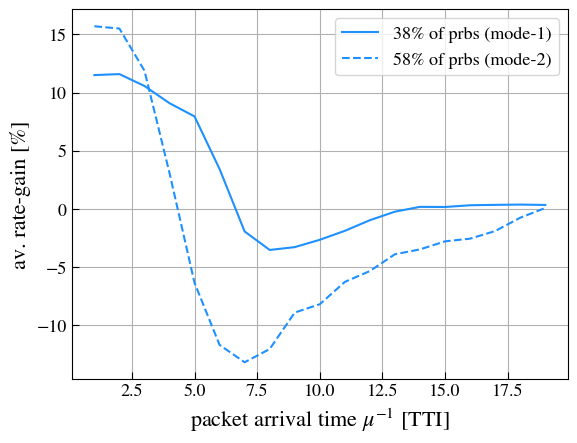

In [637]:
plt.plot(mu_range,list(mean_rate_Gain[prb_ana[1]]),color=col,label=str(prb_ana[1]*2)+ '% of prbs (mode-1)')
plt.plot(mu_range,list(mean_rate_Gain[prb_ana[0]]),color=col,linestyle='dashed', label=str(prb_ana[0]*2)+'% of prbs (mode-2)')
#plt.plot(mu_range,list(mean_rate_Gain[13]),color='#1f77b4',linestyle='dotted',label='24 % of prbs')
min=np.min(np.append(mean_rate_Gain[prb_ana[1]],mean_rate_Gain[prb_ana[0]]))
max=np.max(np.append(mean_rate_Gain[prb_ana[1]],mean_rate_Gain[prb_ana[0]]))
#plt.vlines(x=full_load,ymin=min, ymax=max,ls='-',label='load boundary',colors='green')

    #plt.legend()
plt.grid()
plt.legend( prop={'size': 13})
plt.xlabel('packet arrival time $\mu^{-1}$ [TTI]')
plt.ylabel('av. rate-gain [%]')

### Create Tables for side info

In [638]:
red_dic={}
red_stat={}
for i in prb_ana:
    red_dic_saver={}
    red_stat_saver={}
    x=Gain_std_max_min_10_90[i].copy()
    y=stat_dic[i]
    for j in mu_range:
        if(j<=20):
            red_dic_saver.update({j:x[j]})
            red_stat_saver.update({j:y[j]})
    red_dic.update({i:red_dic_saver})
    red_stat.update({i:red_stat_saver})

In [639]:
red_dic_19=red_dic[prb_ana[0]]
red_dic_29=red_dic[prb_ana[1]]
red_stat_19=red_stat[prb_ana[0]]
red_stat_29=red_stat[prb_ana[1]]
for i in red_dic_29:
    red_dic_19[i]=tuple(np.round(red_dic_19[i],2))
    red_stat_19[i]=tuple(np.round(red_stat_19[i],2))
for i in red_dic_29:
    red_dic_29[i]=tuple(np.round(red_dic_29[i],2))
    red_stat_29[i]=tuple(np.round(red_stat_29[i],2))

In [640]:
from tabulate import tabulate
headers = ["mu","mean","max_c","min_c","max_nc","min_nc", "max_gain", "min_gain","comp-max","comp-min"]
print(tabulate([(k,) + v for k, v in red_dic_19.items()], headers=headers))
print()
print(tabulate([(k,) + v for k, v in red_dic_29.items()], headers=headers))

  mu    mean    max_c    min_c    max_nc    min_nc    max_gain    min_gain    comp-max    comp-min
----  ------  -------  -------  --------  --------  ----------  ----------  ----------  ----------
   1   15.69  2110.65    64.14   2947.6     105.72      224.75      -40.1            1           0
   2   14.85  2053.32    64.15   2058.81    108.84      208.73      -41.53           1           0
   3   11.76  1412.07    64.97   1411.75    117.97      147.07      -45.67           1           0
   4    2.55  1085.9     67.65   1086.08    129.55      139.22      -48.23           1           0
   5   -5.95   883.4     77.67    883.4     139.99       82.81      -45.07           1           0
   6  -11      748.33    85.02    745.39    182.61       41.75      -53.86           1           0
   7  -13.52   642.69    89.03    639.38    213.74        2.09      -58.35           1           0
   8  -11.34   559.4     96.05    556.01    262.33        1.24      -63.54           1           0
   9   -8.

In [641]:
print(tabulate([(k,) + v for k, v in red_dic_19.items()], headers=headers,tablefmt='latex'))

\begin{tabular}{rrrrrrrrrr}
\hline
   mu &   mean &   max\_c &   min\_c &   max\_nc &   min\_nc &   max\_gain &   min\_gain &   comp-max &   comp-min \\
\hline
    1 &  15.69 & 2110.65 &   64.14 &  2947.6  &   105.72 &     224.75 &     -40.1  &          1 &          0 \\
    2 &  14.85 & 2053.32 &   64.15 &  2058.81 &   108.84 &     208.73 &     -41.53 &          1 &          0 \\
    3 &  11.76 & 1412.07 &   64.97 &  1411.75 &   117.97 &     147.07 &     -45.67 &          1 &          0 \\
    4 &   2.55 & 1085.9  &   67.65 &  1086.08 &   129.55 &     139.22 &     -48.23 &          1 &          0 \\
    5 &  -5.95 &  883.4  &   77.67 &   883.4  &   139.99 &      82.81 &     -45.07 &          1 &          0 \\
    6 & -11    &  748.33 &   85.02 &   745.39 &   182.61 &      41.75 &     -53.86 &          1 &          0 \\
    7 & -13.52 &  642.69 &   89.03 &   639.38 &   213.74 &       2.09 &     -58.35 &          1 &          0 \\
    8 & -11.34 &  559.4  &   96.05 &   556.01 &   262.33

In [642]:
from tabulate import tabulate
headers = ["std","10% Quantil","90% Quantil"]
print(tabulate([(k,) + v for k, v in red_stat_19.items()], headers=headers))
print()
print(tabulate([(k,) + v for k, v in red_stat_29.items()], headers=headers))

      std    10% Quantil    90% Quantil
--  -----  -------------  -------------
 1  66.84         -39.68          89.77
 2  62.93         -41.28          85.83
 3  50.72         -44.94          88.74
 4  41.24         -48.11          39.17
 5  27.66         -44.84           6.61
 6  22.5          -53.45           1.21
 7  21.14         -57.98           0.97
 8  21.62         -52.62           0.88
 9  21.24         -39.53           0.93
10  19.97         -33.89           0.84
11  18.77         -13.8            1.23
12  17.3          -11.89           0.97
13  14.24         -10.88           1.1
14  14.26          -1.83           1.25
15   9.87          -0.47           1.18
16   9.74          -1.27           1.41
17   7.26          -0.09           1.69
18   5.85          -0.18           1.23
19   1.28          -0.32           1.45

      std    10% Quantil    90% Quantil
--  -----  -------------  -------------
 1  31.29         -12.14          37.42
 2  30.82         -11.86          41.37


In [643]:
print(tabulate([(k,) + v for k, v in red_stat_19.items()], headers=headers,tablefmt='latex'))

\begin{tabular}{rrrr}
\hline
    &   std &   10\% Quantil &   90\% Quantil \\
\hline
  1 & 66.84 &        -39.68 &         89.77 \\
  2 & 62.93 &        -41.28 &         85.83 \\
  3 & 50.72 &        -44.94 &         88.74 \\
  4 & 41.24 &        -48.11 &         39.17 \\
  5 & 27.66 &        -44.84 &          6.61 \\
  6 & 22.5  &        -53.45 &          1.21 \\
  7 & 21.14 &        -57.98 &          0.97 \\
  8 & 21.62 &        -52.62 &          0.88 \\
  9 & 21.24 &        -39.53 &          0.93 \\
 10 & 19.97 &        -33.89 &          0.84 \\
 11 & 18.77 &        -13.8  &          1.23 \\
 12 & 17.3  &        -11.89 &          0.97 \\
 13 & 14.24 &        -10.88 &          1.1  \\
 14 & 14.26 &         -1.83 &          1.25 \\
 15 &  9.87 &         -0.47 &          1.18 \\
 16 &  9.74 &         -1.27 &          1.41 \\
 17 &  7.26 &         -0.09 &          1.69 \\
 18 &  5.85 &         -0.18 &          1.23 \\
 19 &  1.28 &         -0.32 &          1.45 \\
\hline
\end{tabular}


### Restuls

In [644]:
min_rates_dic={}
min_r=np.array([])
for j in prb_range:
    dict_saver={}
    for i in mu_range:
        min_r=np.array([])
        x=results[j][i]['m1']
        x2=results[j][i]['m2']
        min_r=np.append(min_r,np.min(x))
        min_r=np.append(min_r,np.min(x2))
        dict_saver.update({i:min_r})
    min_rates_dic.update({j:dict_saver})

In [645]:
mean_gain={}
min_rate_c={}
min_rate_nc={}
mean_rate_c={}
mean_rate_nc={}
for j in prb_range:
    mean=np.array([])
    min_nc=np.array([])
    min_c=np.array([])
    mean_nc=np.array([])
    mean_c=np.array([])    
    for i in mu_range:
        mean=np.append(mean,np.mean((results[j][i]['gain'])))
        min_c=np.append(min_c,np.min(results[j][i]['m2']))
        min_nc=np.append(min_nc,np.min(results[j][i]['m1']))
        mean_c=np.append(mean_c,np.mean(results[j][i]['m2']))
        mean_nc=np.append(mean_nc,np.mean(results[j][i]['m1']))
    mean_gain.update({j:mean})
    min_rate_c.update({j:min_c})
    min_rate_nc.update({j:min_nc})
    mean_rate_c.update({j:mean_c})
    mean_rate_nc.update({j:mean_nc})

In [646]:

gain_133_1=np.array([])
gain_133_2=np.array([])
gain_320_1=np.array([])
gain_320_2=np.array([])
gain_comp_1=np.array([])
gain_comp_2=np.array([])


for i in mu_range:
    x=results[prb_ana[0]][i]['gain'][0:30]*results[prb_ana[0]][i]['comp'][0:30]
    x=x[x!=0]
    gain_comp_1=np.append(gain_comp_1,np.mean(x))
    
    x=results[prb_ana[1]][i]['gain'][0:30]*results[prb_ana[0]][i]['comp'][0:30]
    x=x[x!=0]
    gain_comp_2=np.append(gain_comp_2,np.mean(x))
    
    x=results[prb_ana[0]][i]['gain'][0:15]*(1-results[prb_ana[0]][i]['comp'][0:15])
    x=x[x!=0]
    gain_133_1=np.append(gain_133_1,np.mean(x))
    
    x=results[prb_ana[1]][i]['gain'][0:15]*(1-results[prb_ana[1]][i]['comp'][0:15])
    x=x[x!=0]
    gain_133_2=np.append(gain_133_2,np.mean(x))
    
    x=results[prb_ana[0]][i]['gain'][15:30]*(1-results[prb_ana[0]][i]['comp'][15:30])
    x=x[x!=0]
    gain_320_1=np.append(gain_320_1,np.mean(x))
    
    x=results[prb_ana[1]][i]['gain'][15:30]*(1-results[prb_ana[1]][i]['comp'][15:30])
    x=x[x!=0]
    gain_320_2=np.append(gain_320_2,np.mean(x))
    

In [647]:
mu_range2=1/mu_range*full_load*100

Text(0, 0.5, 'system load [%]')

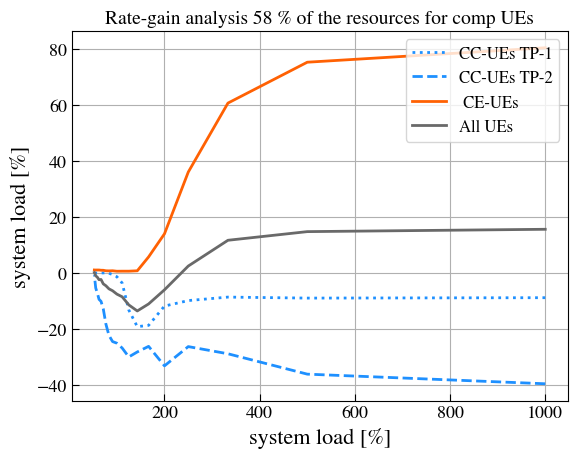

In [648]:

beg=0
end=24
plt.plot(mu_range2[beg:end],gain_133_1[beg:end],color=col,linestyle='dotted', label='CC-UEs TP-1',linewidth=2)
plt.plot(mu_range2[beg:end],gain_320_1[beg:end],color=col,linestyle='dashed', label= 'CC-UEs TP-2',linewidth=2)
plt.plot(mu_range2[beg:end],gain_comp_1[beg:end],color='#FF6103', label=' CE-UEs',linewidth=2)
plt.plot(mu_range2[beg:end],mean_gain[prb_ana[0]][beg:end],color='dimgrey', label='All UEs',linewidth=2)
#plt.vlines(x=mu_range2[full_load],ymin=-50, ymax=85,ls='-',label='load boundary',colors='green')

#plt.legend()
plt.title('Rate-gain analysis '+ str(prb_ana[0]*2) + ' % of the resources for comp UEs', fontsize=14)
plt.grid()
plt.legend( prop={'size': 12})
plt.xlabel('packet arrival rate $\mu$ [ms]')
#plt.xlim(0,16)
#plt.ylim(-50,85)

plt.xlabel('system load [%]')
plt.ylabel('system load [%]')

Text(0, 0.5, 'system load [%]')

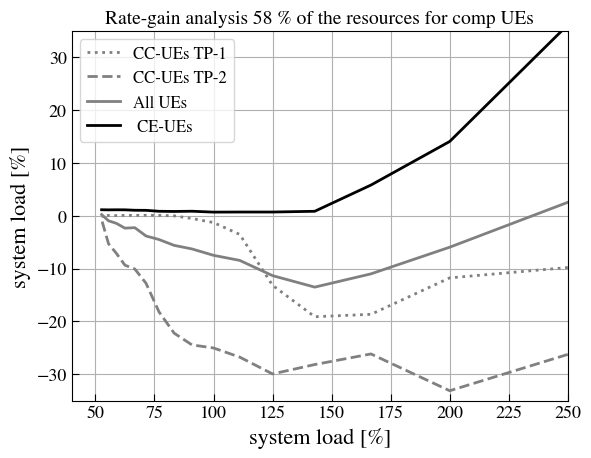

In [655]:
beg=3
end=19
plt.plot(mu_range2[beg:end],gain_133_1[beg:end],color='grey',linestyle='dotted', label='CC-UEs TP-1',linewidth=2)
plt.plot(mu_range2[beg:end],gain_320_1[beg:end],color='grey',linestyle='dashed', label= 'CC-UEs TP-2',linewidth=2)
plt.plot(mu_range2[beg:end],mean_gain[prb_ana[0]][beg:end],color='grey', label='All UEs',linewidth=2)
plt.plot(mu_range2[beg:end],gain_comp_1[beg:end],color='black', label=' CE-UEs',linewidth=2)
#plt.vlines(x=mu_range2[full_load],ymin=-50, ymax=85,ls='-',label='load boundary',colors='green')

#plt.legend()
plt.title('Rate-gain analysis '+ str(prb_ana[0]*2) + ' % of the resources for comp UEs', fontsize=14)
plt.grid()
plt.legend( prop={'size': 12})
plt.xlabel('packet arrival rate $\mu$ [ms]')
plt.xlim(40,mu_range2[3])
plt.ylim(-35,35)

plt.xlabel('system load [%]')
plt.ylabel('system load [%]')

In [650]:
dict_min_mean={}
min_list_c=np.array([])
mean_list_c=np.array([])

min_list_nc=np.array([])
mean_list_nc=np.array([])

nr=29
x=results[nr][1]['m1'][0:15]*(1-results[nr][1]['comp'][0:15])
x=x[x!=0]
print('TP1')
print('no comp ues:')
print('min:',np.min(x))
print('mean:',np.mean(x))
min_list_nc=np.append(min_list_nc,np.min(x))
mean_list_nc=np.append(mean_list_nc,np.mean(x))

x=results[nr][1]['m2'][0:15]*(1-results[nr][1]['comp'][0:15])
x=x[x!=0]
np.min(x)
print('comp ues:')
print('min:',np.min(x))
print('mean:',np.mean(x))
min_list_c=np.append(min_list_c,np.min(x))
mean_list_c=np.append(mean_list_c,np.mean(x))

x=results[nr][1]['m1'][15:30]*(1-results[19][1]['comp'][15:30])
x=x[x!=0]
np.min(x)
print('TP2')
print('no comp ues:')
print('min:',np.min(x))
print('mean:',np.mean(x))
min_list_nc=np.append(min_list_nc,np.min(x))
mean_list_nc=np.append(mean_list_nc,np.mean(x))

x=results[nr][1]['m2'][15:30]*(1-results[19][1]['comp'][15:30])
x=x[x!=0]
np.min(x)
print('comp ues:')
print('min:',np.min(x))
print('mean:',np.mean(x))
min_list_c=np.append(min_list_c,np.min(x))
mean_list_c=np.append(mean_list_c,np.mean(x))

x=results[nr][1]['m1']*(results[19][1]['comp'])
x=x[x!=0]
np.min(x)
print('Cell Edge')
print('no comp')
print('min:',np.min(x))
print('mean:',np.mean(x))
min_list_nc=np.append(min_list_nc,np.min(x))
mean_list_nc=np.append(mean_list_nc,np.mean(x))

x=results[nr][1]['m2']*(results[29][1]['comp'])
x=x[x!=0]
np.min(x)
print('comp')
print('min:',np.min(x))
print('mean:',np.mean(x))
min_list_c=np.append(min_list_c,np.min(x))
mean_list_c=np.append(mean_list_c,np.mean(x))

dict_min_mean['mean comp']= tuple(np.round(mean_list_c,1))
dict_min_mean['mean no comp']= tuple(np.round(mean_list_nc,1))
dict_min_mean['min comp']= tuple(np.round(min_list_c,1))
dict_min_mean['min no comp']= tuple(np.round(min_list_nc,1))

TP1
no comp ues:
min: 260.3634990039906
mean: 706.1485681410177
comp ues:
min: 234.9957400128151
mean: 644.0743320058411
TP2
no comp ues:
min: 105.71863167159486
mean: 1174.771255761527
comp ues:
min: 64.14392868488915
mean: 707.6887699116971
Cell Edge
no comp
min: 385.68176740843944
mean: 862.0548872536342
comp
min: 809.3235376130389
mean: 1397.356654426642


In [651]:
from tabulate import tabulate
headers = ["rate","TP1 central UEs","TP2 central UEs","Cell-edge UE"]
print(tabulate([(k,) + v for k, v in dict_min_mean.items()], headers=headers,tablefmt='latex'))

\begin{tabular}{lrrr}
\hline
 rate         &   TP1 central UEs &   TP2 central UEs &   Cell-edge UE \\
\hline
 mean comp    &             644.1 &             707.7 &         1397.4 \\
 mean no comp &             706.1 &            1174.8 &          862.1 \\
 min comp     &             235   &              64.1 &          809.3 \\
 min no comp  &             260.4 &             105.7 &          385.7 \\
\hline
\end{tabular}


Text(0, 0.5, 'av. rate-gain [%]')

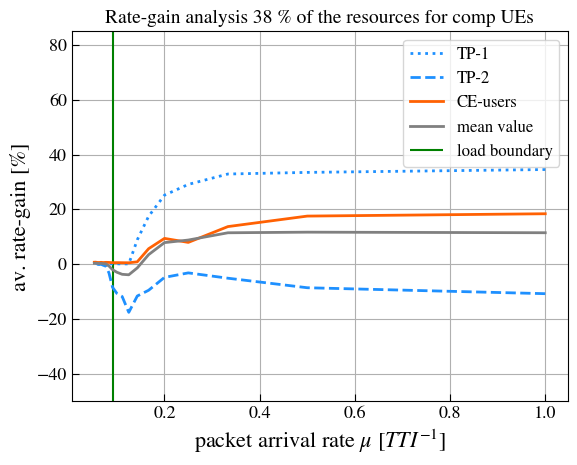

In [652]:
#plt.plot(mu_range,list(gain_133),color='#1f77b4', label='38 % TP-1')
#plt.plot(mu_range,list(gain_320),color='#1f77b4',linestyle='dashed', label='38 % TP-2')
#plt.plot(mu_range,list(gain_comp),color='#1f77b4',linestyle='dotted', label='38 % comp')

beg=0
end=20

plt.plot(1/mu_range[beg:end],list(gain_133_2)[beg:end],color=col,linestyle='dotted',label='TP-1',linewidth=2)
plt.plot(1/mu_range[beg:end],list(gain_320_2)[beg:end],color=col,linestyle='dashed', label='TP-2',linewidth=2)
plt.plot(1/mu_range[beg:end],list(gain_comp_2)[beg:end],color='#FF6103', label='CE-users',linewidth=2)
plt.plot(1/mu_range[beg:end],list(mean_gain[prb_ana[1]])[beg:end],color='grey', label='mean value',linewidth=2)
plt.vlines(x=1/mu_range[full_load],ymin=-50, ymax=85,ls='-',label='load boundary',colors='green')
#plt.xlim(0,16)
plt.ylim(-50,85)
#plt.legend()

plt.grid()
plt.title('Rate-gain analysis '+ str(prb_ana[1]*2) + ' % of the resources for comp UEs', fontsize=14)
plt.legend( prop={'size': 12})
plt.xlabel('packet arrival rate $\mu$ [$TTI^{-1}$]')
plt.ylabel('av. rate-gain [%]')

In [653]:
len(mu_range)

19

Text(0, 0.5, 'av. rate-gain [%]')

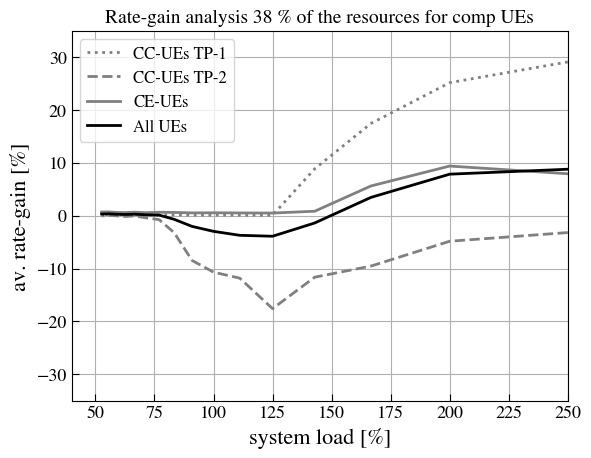

In [654]:
#plt.plot(mu_range,list(gain_133),color='#1f77b4', label='38 % TP-1')
#plt.plot(mu_range,list(gain_320),color='#1f77b4',linestyle='dashed', label='38 % TP-2')
#plt.plot(mu_range,list(gain_comp),color='#1f77b4',linestyle='dotted', label='38 % comp')

beg=3
end=19

plt.plot(mu_range2[beg:end],list(gain_133_2)[beg:end],color='grey',linestyle='dotted',label='CC-UEs TP-1',linewidth=2)
plt.plot(mu_range2[beg:end],list(gain_320_2)[beg:end],color='grey',linestyle='dashed', label='CC-UEs TP-2',linewidth=2)
plt.plot(mu_range2[beg:end],list(gain_comp_2)[beg:end],color='grey', label='CE-UEs',linewidth=2)
plt.plot(mu_range2[beg:end],list(mean_gain[prb_ana[1]])[beg:end],color='black', label='All UEs',linewidth=2)
#plt.vlines(x=1/mu_range[full_load],ymin=-50, ymax=85,ls='-',label='load boundary',colors='green')
plt.xlim(40,mu_range2[3])
plt.ylim(-35,35)
#plt.legend()

plt.grid()
plt.title('Rate-gain analysis '+ str(prb_ana[1]*2) + ' % of the resources for comp UEs', fontsize=14)
plt.legend( prop={'size': 12})
plt.xlabel('system load [%]')
plt.ylabel('av. rate-gain [%]')

Text(0, 0.5, 'av. rate-gain [%]')

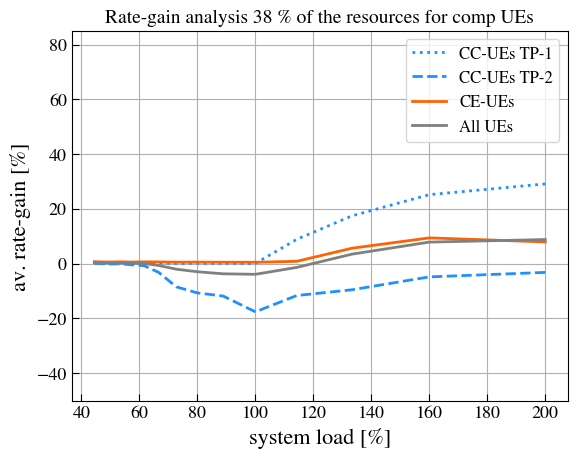

In [571]:
#plt.plot(mu_range,list(gain_133),color='#1f77b4', label='38 % TP-1')
#plt.plot(mu_range,list(gain_320),color='#1f77b4',linestyle='dashed', label='38 % TP-2')
#plt.plot(mu_range,list(gain_comp),color='#1f77b4',linestyle='dotted', label='38 % comp')

beg=3
end=18

plt.plot(mu_range2[beg:end],list(gain_133_2)[beg:end],color=col,linestyle='dotted',label='CC-UEs TP-1',linewidth=2)
plt.plot(mu_range2[beg:end],list(gain_320_2)[beg:end],color=col,linestyle='dashed', label='CC-UEs TP-2',linewidth=2)
plt.plot(mu_range2[beg:end],list(gain_comp_2)[beg:end],color='#FF6103', label='CE-UEs',linewidth=2)
plt.plot(mu_range2[beg:end],list(mean_gain[prb_ana[1]])[beg:end],color='grey', label='All UEs',linewidth=2)
#plt.vlines(x=1/mu_range[full_load],ymin=-50, ymax=85,ls='-',label='load boundary',colors='green')
#plt.xlim(0,16)
plt.ylim(-50,85)
#plt.legend()

plt.grid()
plt.title('Rate-gain analysis '+ str(prb_ana[1]*2) + ' % of the resources for comp UEs', fontsize=14)
plt.legend( prop={'size': 12})
plt.xlabel('system load [%]')
plt.ylabel('av. rate-gain [%]')

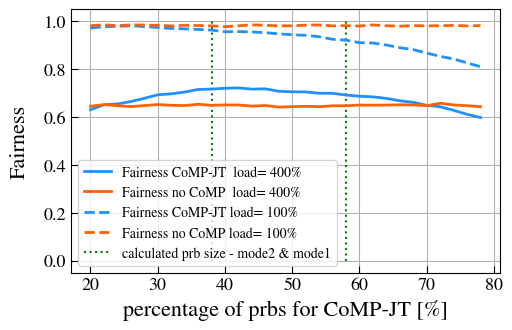

In [572]:
fsize = 15 # Allgemein
tsize = 18 # Legende

tdir = 'in'
major = 5.0 # Länge major ticks
minor = 3.0 # Länge minor ticks
lwidth = 0.8 # Dicke Rahmen
lhandle = 2.0 # Länge handle in Legende
plt.style.use('default')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

# Bildgroesse
fig_width_pt = 400  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches

no_c=np.array([])
c=np.array([])
for i in prb_range:
    c=np.append(c,fcomp[i][1])
    no_c=np.append(no_c,fNocomp[i][1])



plt.figure(figsize=(fig_width,fig_height)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)


count=0
plt.plot((prb_range[0:35]/50)*100,c[0:35],color='dodgerblue',label='Fairness CoMP-JT  load= 400%',linewidth=2)
plt.plot((prb_range[0:35]/50)*100,no_c[0:35],color='#FF6103',label='Fairness no CoMP  load= 400%',linewidth=2)

no_c=np.array([])
c=np.array([])
for i in prb_range:
    c=np.append(c,fcomp[i][7])
    no_c=np.append(no_c,fNocomp[i][7])

plt.plot((prb_range[0:35]/50)*100,c[0:35],color='dodgerblue',linestyle='--',label='Fairness CoMP-JT load= 100%',linewidth=2)
plt.plot((prb_range[0:35]/50)*100,no_c[0:35],color='#FF6103',linestyle='--',label='Fairness no CoMP load= 100%',linewidth=2)

#plt.legend()
plt.grid()
plt.xlabel('percentage of prbs for CoMP-JT [%]')
plt.ylabel('Fairness',labelpad = 10)
plt.vlines(x=58,ymin=0, ymax=1,ls=':',label='calculated prb size - mode2 & mode1',colors='green')
plt.vlines(x=38,ymin=0, ymax=1,ls=':',colors='green')
plt.legend(prop={'size': 10},loc='lower left')
#plt.xlim(0,1)
count+=1

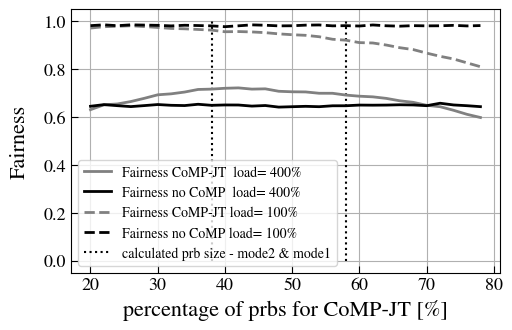

In [619]:
fsize = 15 # Allgemein
tsize = 18 # Legende

tdir = 'in'
major = 5.0 # Länge major ticks
minor = 3.0 # Länge minor ticks
lwidth = 0.8 # Dicke Rahmen
lhandle = 2.0 # Länge handle in Legende
plt.style.use('default')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

# Bildgroesse
fig_width_pt = 400  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches

no_c=np.array([])
c=np.array([])
for i in prb_range:
    c=np.append(c,fcomp[i][1])
    no_c=np.append(no_c,fNocomp[i][1])



plt.figure(figsize=(fig_width,fig_height)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)


count=0
plt.plot((prb_range[0:35]/50)*100,c[0:35],color='grey',label='Fairness CoMP-JT  load= 400%',linewidth=2)
plt.plot((prb_range[0:35]/50)*100,no_c[0:35],color='black',label='Fairness no CoMP  load= 400%',linewidth=2)

no_c=np.array([])
c=np.array([])
for i in prb_range:
    c=np.append(c,fcomp[i][7])
    no_c=np.append(no_c,fNocomp[i][7])

plt.plot((prb_range[0:35]/50)*100,c[0:35],color='grey',linestyle='--',label='Fairness CoMP-JT load= 100%',linewidth=2)
plt.plot((prb_range[0:35]/50)*100,no_c[0:35],color='black',linestyle='--',label='Fairness no CoMP load= 100%',linewidth=2)

#plt.legend()
plt.grid()
plt.xlabel('percentage of prbs for CoMP-JT [%]')
plt.ylabel('Fairness',labelpad = 10)
plt.vlines(x=58,ymin=0, ymax=1,ls=':',label='calculated prb size - mode2 & mode1',colors='black')
plt.vlines(x=38,ymin=0, ymax=1,ls=':',colors='black')
plt.legend(prop={'size': 10},loc='lower left')
#plt.xlim(0,1)
count+=1

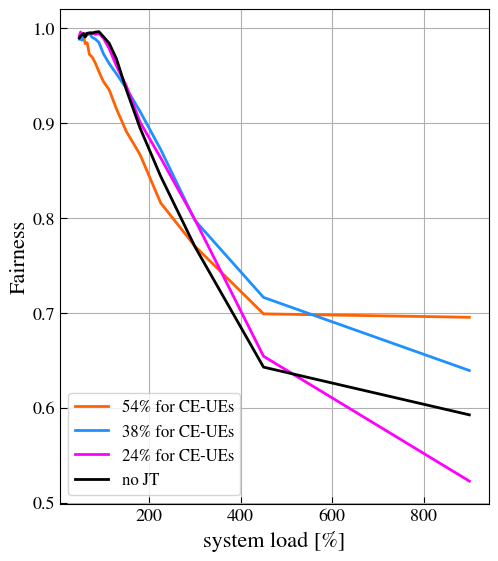

In [620]:
plt.figure(figsize=(fig_width,fig_height+3)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)

be=0
end=24
count=0

plt.plot(mu_range2[be:end],fcomp[27][be:end],color='#FF6103',label='54% for CE-UEs',linewidth=2)
plt.plot(mu_range2[be:end],fcomp[19][be:end],color='dodgerblue',label='38% for CE-UEs',linewidth=2)

plt.plot(mu_range2[be:end],fcomp[12][be:end],color='magenta',label='24% for CE-UEs',linewidth=2)

plt.plot(mu_range2[be:end],fNocomp[27][be:end],color='black',label='no JT',linewidth=2)

#plt.plot(mu_range[0:15],fcomp[15][0:15],color='#1f77b4',label='comp - 30%')

#plt.vlines(x=full_load,ymin=0.5,linestyle='dotted', ymax=1,colors='green',linewidth=2)

#plt.ylim(0,1)
#plt.legend()
plt.grid()
plt.xlabel('system load [%]')
plt.ylabel('Fairness',labelpad = 2)
#plt.vlines(x=58,ymin=0, ymax=1,ls=':',label='calculated prb size - mode1',colors='green')
plt.legend(prop={'size': 12},loc='lower left')

In [622]:
mu_range2

array([900.        , 450.        , 300.        , 225.        ,
       180.        , 150.        , 128.57142857, 112.5       ,
       100.        ,  90.        ,  81.81818182,  75.        ,
        69.23076923,  64.28571429,  60.        ,  56.25      ,
        52.94117647,  50.        ,  47.36842105])

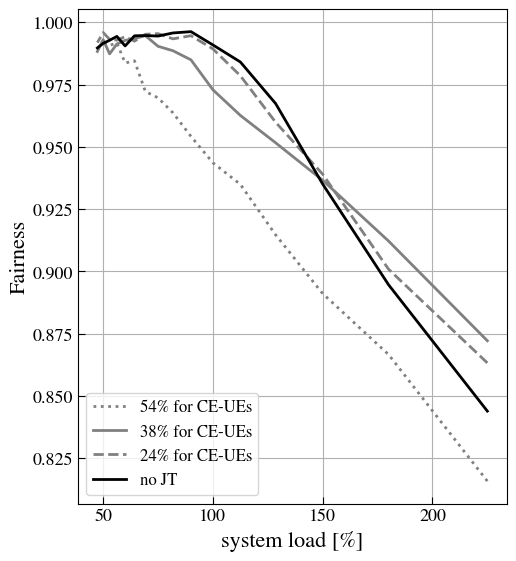

In [624]:
plt.figure(figsize=(fig_width,fig_height+3)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)

be=3
end=19
count=0

plt.plot(mu_range2[be:end],fcomp[27][be:end],color='grey',linestyle='dotted',label='54% for CE-UEs',linewidth=2)
plt.plot(mu_range2[be:end],fcomp[19][be:end],color='grey',label='38% for CE-UEs',linewidth=2)

plt.plot(mu_range2[be:end],fcomp[12][be:end],color='grey',linestyle='--',label='24% for CE-UEs',linewidth=2)

plt.plot(mu_range2[be:end],fNocomp[27][be:end],color='black',label='no JT',linewidth=2)

#plt.plot(mu_range[0:15],fcomp[15][0:15],color='#1f77b4',label='comp - 30%')

#plt.vlines(x=full_load,ymin=0.5,linestyle='dotted', ymax=1,colors='green',linewidth=2)

#plt.ylim(0,1)
#plt.legend()
plt.grid()
plt.xlabel('system load [%]')
plt.ylabel('Fairness',labelpad = 2)
#plt.vlines(x=58,ymin=0, ymax=1,ls=':',label='calculated prb size - mode1',colors='green')
plt.legend(prop={'size': 12},loc='lower left')

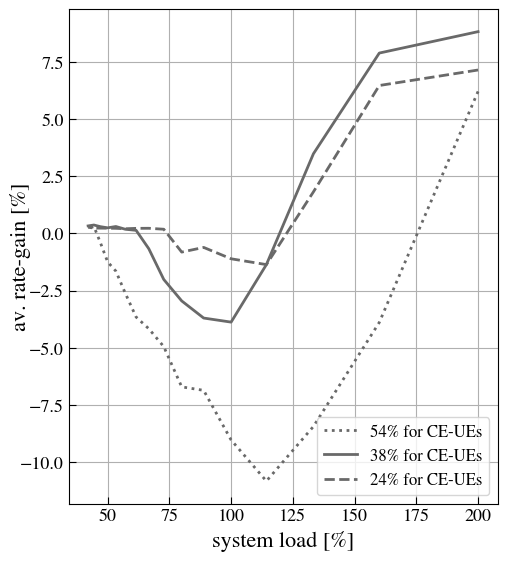

In [577]:
plt.figure(figsize=(fig_width,fig_height+3)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)

be=3
end=19

count=0
plt.plot(mu_range2[be:end],mean_gain[27][be:end],color='dimgrey',linestyle='dotted', label='54% for CE-UEs',linewidth=2)
plt.plot(mu_range2[be:end],list(mean_gain[19])[be:end],color='dimgrey',label='38% for CE-UEs',linewidth=2)
plt.plot(mu_range2[be:end],mean_gain[12][be:end],color='dimgrey',linestyle='--',label='24% for CE-UEs',linewidth=2)
plt.legend(fontsize=9)
#plt.xlim(0,16)
#plt.legend()
plt.grid()
plt.xlabel('system load [%]')
plt.ylabel('av. rate-gain [%]',labelpad = -8)
#plt.vlines(x=10,ymin=-12,linestyle='dotted', ymax=17,colors='green',linewidth=2)
plt.legend(prop={'size': 12},loc='lower right')

In [582]:
if(scheduling=='pf_2'):
    range2=[27,19,12]
    gain_new2=np.array([])
    fairness_new2=np.array([])
    gain_new2=np.append(gain_new2,mean_gain[range2[2]][0:4])
    gain_new2=np.append(gain_new2,mean_gain[range2[1]][4:17])
    gain_new2=np.append(gain_new2,mean_gain[range2[0]][17::])
    fairness_new2=np.append(fairness_new2,fcomp[range2[2]][0:4])
    fairness_new2=np.append(fairness_new2,fcomp[range2[1]][4:17])
    fairness_new2=np.append(fairness_new2,fcomp[range2[0]][17::])
    new_approach_min_r2=np.array([])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[2]][0:4])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[1]][4:17])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[0]][17::])
if(scheduling=='pf-resback'):
    range2=[27,19,12]
    gain_new2=np.array([])
    fairness_new2=np.array([])
    gain_new2=np.append(gain_new2,mean_gain[range2[0]][0:2])
    gain_new2=np.append(gain_new2,mean_gain[range2[1]][2:5])
    gain_new2=np.append(gain_new2,mean_gain[range2[2]][5::])
    fairness_new2=np.append(fairness_new2,fcomp[range2[0]][0:2])
    fairness_new2=np.append(fairness_new2,fcomp[range2[1]][2:5])
    fairness_new2=np.append(fairness_new2,fcomp[range2[2]][5::])
    new_approach_min_r2=np.array([])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[0]][0:2])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[1]][2:5])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[2]][5::])
if(scheduling=='pf'):
    range2=[27,19,12]
    gain_new2=np.array([])
    fairness_new2=np.array([])
    gain_new2=np.append(gain_new2,mean_gain[range2[0]][0:2])
    gain_new2=np.append(gain_new2,mean_gain[range2[1]][2:5])
    gain_new2=np.append(gain_new2,mean_gain[range2[2]][5::])
    fairness_new2=np.append(fairness_new2,fcomp[range2[0]][0:2])
    fairness_new2=np.append(fairness_new2,fcomp[range2[1]][2:5])
    fairness_new2=np.append(fairness_new2,fcomp[range2[2]][5::])
    new_approach_min_r2=np.array([])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[0]][0:2])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[1]][2:5])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[2]][5::])
elif(scheduling=='rr'):
    range2=[27,19,12]
    gain_new2=np.array([])
    fairness_new2=np.array([])
    gain_new2=np.append(gain_new2,mean_gain[range2[0]][0:2])
    gain_new2=np.append(gain_new2,mean_gain[range2[1]][2:5])
    gain_new2=np.append(gain_new2,mean_gain[range2[2]][5::])
    fairness_new2=np.append(fairness_new2,fcomp[range2[0]][0:2])
    fairness_new2=np.append(fairness_new2,fcomp[range2[1]][2:5])
    fairness_new2=np.append(fairness_new2,fcomp[range2[2]][5::])
    new_approach_min_r2=np.array([])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[0]][0:2])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[1]][2:5])
    new_approach_min_r2=np.append(new_approach_min_r2,min_rate_c[range2[2]][5::])

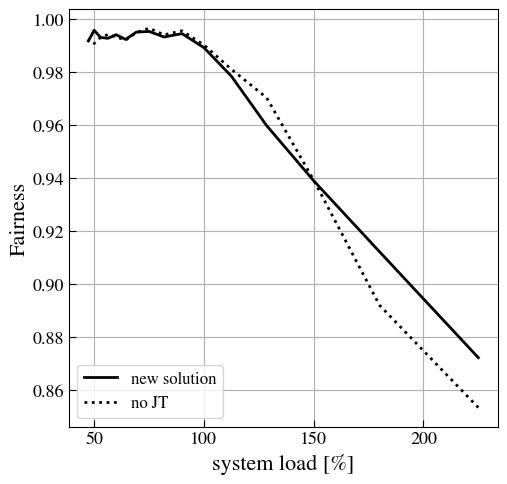

In [632]:
plt.figure(figsize=(fig_width,fig_height+2)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)

be=3
end=19
plt.grid()
plt.xlabel('system load [%]')
plt.ylabel('Fairness',labelpad = 2)
#plt.vlines(x=58,ymin=0, ymax=1,ls=':',label='calculated prb size - mode1',colors='green')
plt.plot(mu_range2[be:end],fairness_new2[be:end],color='black',label='new solution',linewidth=2)
plt.plot(mu_range2[be:end],fNocomp[29][be:end],color='black',linestyle='dotted',label='no JT',linewidth=2)
plt.legend(prop={'size': 12},loc='lower left')

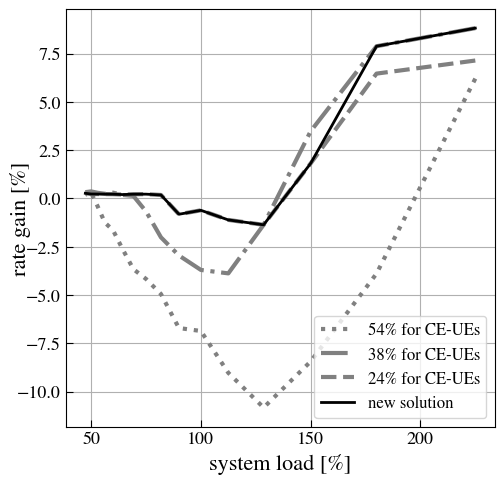

In [633]:
plt.figure(figsize=(fig_width,fig_height+2)) 
parameters = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize':13,'ytick.labelsize':13,'figure.titlesize':20}
plt.rcParams.update(parameters)

be=3
end=19

plt.xlabel('system load [%]')
plt.ylabel('rate gain [%]',labelpad = -10)


#plt.plot(mu_range2[be:end],gain_new2[be:end],color='black',label='new solution',linewidth=2)
plt.plot(mu_range2[be:end],mean_gain[27][be:end],linestyle='dotted',color='grey', label='54% for CE-UEs',linewidth=3)
plt.plot(mu_range2[be:end],list(mean_gain[19])[be:end],linestyle='dashdot',color='grey',label='38% for CE-UEs',linewidth=3)
plt.plot(mu_range2[be:end],list(mean_gain[12])[be:end],linestyle='--',color='grey',label='24% for CE-UEs',linewidth=3)
plt.plot(mu_range2[be:end],gain_new2[be:end],color='black',label='new solution',linewidth=2)

#plt.title('av. rate-gain',fontsize=11)
plt.legend(prop={'size': 12},loc='lower right')
plt.grid()


In [361]:
x=np.array([1,2,3,4,5,6,7,7,8])

In [368]:
mu_range2

array([ 40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220., 240.,
       260., 280., 300., 320., 340., 360., 380., 400., 420., 440., 460.,
       480., 500., 520., 540., 560., 580., 600., 620., 640., 660., 680.,
       700., 720., 740., 760., 780.])

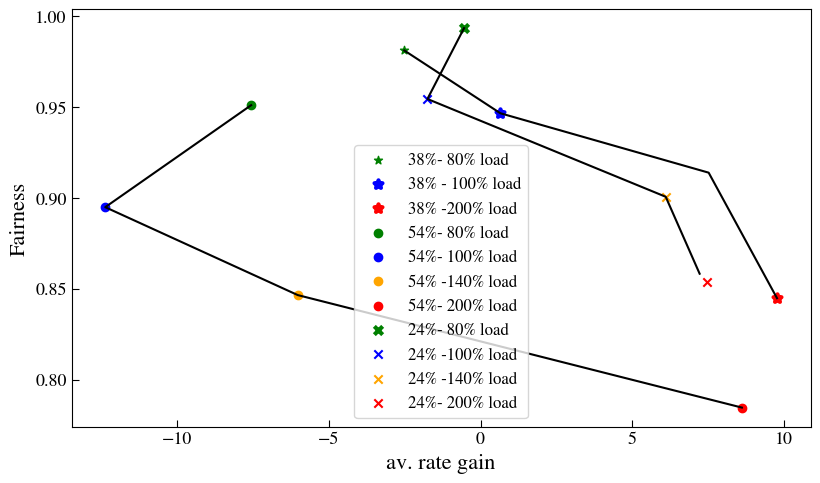

In [426]:
#import plotly.express as px
import matplotlib.pyplot as plt
plt.figure(figsize=(fig_width+4,fig_height+2)) 

plt.plot([mean_gain[19][2],mean_gain[19][4],mean_gain[19][6],mean_gain[19][9]],[fcomp[19][2],fcomp[19][4],fcomp[19][6],fcomp[19][9]],color='black')


plt.scatter(mean_gain[19][2],fcomp[19][2],marker='*',label='38%- 80% load',color='green')
plt.scatter(mean_gain[19][4],fcomp[19][4],marker='*',label='38% - 100% load',color='blue',linewidths=3)
#plt.scatter(mean_gain[19][4],fcomp[19][4],marker='*',label='100% load',)
plt.scatter(mean_gain[19][9],fcomp[19][9],marker='*',label='38% -200% load',color='red',linewidths=3)


plt.plot([mean_gain[29][2],mean_gain[29][4],mean_gain[29][6],mean_gain[29][9]],[fcomp[29][2],fcomp[29][4],fcomp[29][6],fcomp[29][9]],color='black')
plt.scatter(mean_gain[29][2],fcomp[29][2],label='54%- 80% load',color='green')
plt.scatter(mean_gain[29][4],fcomp[29][4],label='54%- 100% load',color='blue')
plt.scatter(mean_gain[29][6],fcomp[29][6],label='54% -140% load',color='orange')
#plt.scatter(mean_gain[19][4],fcomp[19][4],label='100% load')
plt.scatter(mean_gain[29][9],fcomp[29][9],label='54%- 200% load',color='red')


plt.plot([mean_gain[12][2],mean_gain[12][4],mean_gain[12][6],mean_gain[12][8]],[fcomp[12][2],fcomp[12][4],fcomp[12][6],fcomp[12][8]],color='black')
plt.scatter(mean_gain[12][2],fcomp[12][2],marker='x',label='24%- 80% load',color='green',linewidth=3)
plt.scatter(mean_gain[12][4],fcomp[12][4],marker='x',label='24% -100% load',color='blue')
plt.scatter(mean_gain[12][6],fcomp[12][6],marker='x',label='24% -140% load',color='orange')

#plt.scatter(mean_gain[19][4],fcomp[19][4],label='100% load')
plt.scatter(mean_gain[12][9],fcomp[12][9],marker='x',label='24%- 200% load',color='red')




plt.xlabel('av. rate gain')
plt.ylabel('Fairness')

#plt.scatter([mean_gain[19][2],mean_gain[19][4],mean_gain[19][8]],[fcomp[19][2],fcomp[19][4],fcomp[19][8]])
#plt.scatter([mean_gain[19][2],mean_gain[19][4],mean_gain[19][8]],[fNocomp[19][2],fNocomp[19][4],fNocomp[19][8]])
#plt.xlabel('rate-gain JT')
plt.legend(prop={'size': 12})

In [428]:
mu_range[3]

8.0

### Fairness Comparison

In [52]:
mean_gain={}
min_rate_c={}
min_rate_nc={}
mean_rate_c={}
mean_rate_nc={}
for j in prb_range:
    mean=np.array([])
    min_nc=np.array([])
    min_c=np.array([])
    mean_nc=np.array([])
    mean_c=np.array([])    
    for i in mu_range:
        mean=np.append(mean,np.mean((results[j][i]['gain'])))
        min_c=np.append(min_c,np.min(results[j][i]['m2']))
        min_nc=np.append(min_nc,np.min(results[j][i]['m1']))
        mean_c=np.append(mean_c,np.mean(results[j][i]['m2']))
        mean_nc=np.append(mean_nc,np.mean(results[j][i]['m1']))
    mean_gain.update({j:mean})
    min_rate_c.update({j:min_c})
    min_rate_nc.update({j:min_nc})
    mean_rate_c.update({j:mean_c})
    mean_rate_nc.update({j:mean_nc})

Text(0, 0.5, 'min data rate [kbps]')

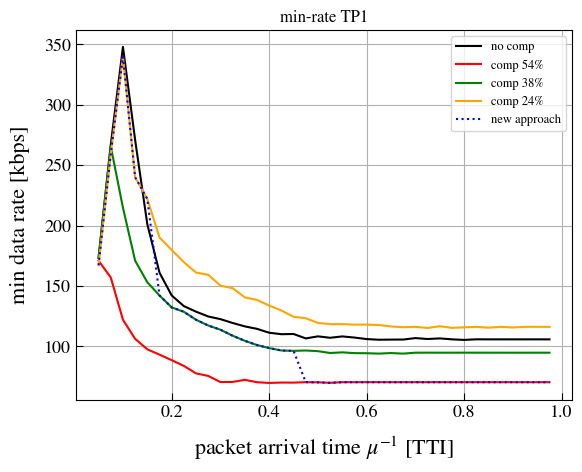

In [53]:
plt.plot(1/mu_range,min_rate_nc[19],color='black',label='no comp')
plt.plot(1/mu_range,min_rate_c[27],color='red',label='comp 54%')
plt.plot(1/mu_range,min_rate_c[19],color='green',label='comp 38%')
plt.plot(1/mu_range,min_rate_c[12],color='orange',label='comp 24%')
plt.plot(1/mu_range,new_approach_min_r2,color='blue',linestyle='dotted',label='new approach')
#sub3.plot(mu_range,new_approach_min_r,color='blue',label='new approach')
plt.legend(fontsize=9)
plt.title('min-rate TP1',fontsize=12)
plt.grid()
plt.xlabel('packet arrival time $\mu^{-1}$ [TTI]',labelpad = 10)
plt.ylabel('min data rate [kbps]',labelpad = 10)

Text(0, 0.5, 'mean data rate [kbps]')

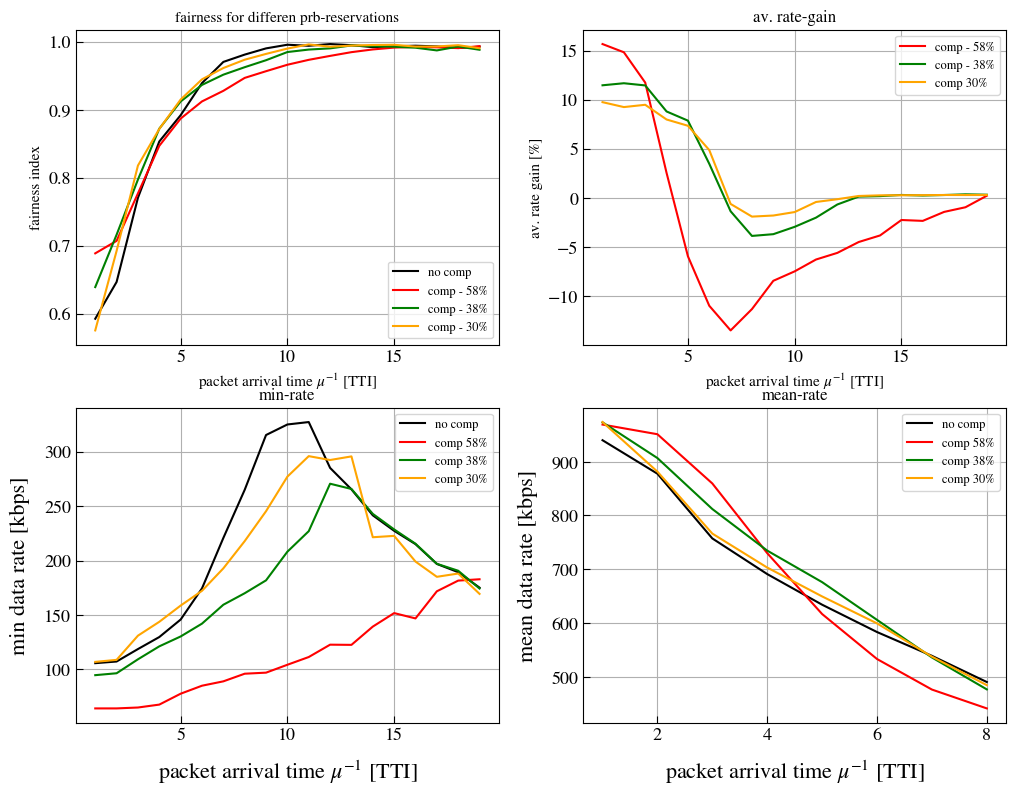

In [33]:
#plt.plot(mu_range,test2,color=col,label='new approach')
fig = plt.figure(figsize=(12, 9))
sub1=plt.subplot(2, 2, 1)
sub1.plot(mu_range,fNocomp[29],color='black',label='no comp')
sub1.plot(mu_range,fcomp[24],color='red',label='comp - 58%')
sub1.plot(mu_range,fcomp[19],color='green',label='comp - 38%')
sub1.plot(mu_range,fcomp[15],color='orange',label='comp - 30%')
sub1.legend(fontsize=9)
sub1.set_title('fairness for differen prb-reservations',fontsize=11)
sub1.grid()
sub1.set_xlabel('packet arrival time $\mu^{-1}$ [TTI]', fontsize=11)
sub1.set_ylabel('fairness index', fontsize=11)

sub2=plt.subplot(2, 2, 2)
sub2.plot(mu_range,mean_gain[29],color='red', label='comp - 58%')
sub2.plot(mu_range,list(mean_gain[19]),color='green',label='comp - 38%')
sub2.plot(mu_range,mean_gain[15],color='orange',label='comp 30%')
sub2.legend(fontsize=9)

sub2.set_title('av. rate-gain',fontsize=12)
#sub2.set_title('rate-gain for differen prb-reservations',labelpad = 10)
sub2.grid()

sub2.set_xlabel('packet arrival time $\mu^{-1}$ [TTI]',  fontsize=11)
sub2.set_ylabel('av. rate gain [%]',  fontsize=11)


sub3=plt.subplot(2, 2, 3)
sub3.plot(mu_range,min_rate_nc[19],color='black',label='no comp')
sub3.plot(mu_range,min_rate_c[29],color='red',label='comp 58%')
sub3.plot(mu_range,min_rate_c[19],color='green',label='comp 38%')
sub3.plot(mu_range,min_rate_c[15],color='orange',label='comp 30%')
#sub3.plot(mu_range,new_approach_min_r,color='blue',label='new approach')
sub3.legend(fontsize=9)
sub3.set_title('min-rate',fontsize=12)
sub3.grid()
sub3.set_xlabel('packet arrival time $\mu^{-1}$ [TTI]',labelpad = 10)
sub3.set_ylabel('min data rate [kbps]',labelpad = 10)


sub4=plt.subplot(2, 2, 4)
sub4.plot(mu_range[0:8],mean_rate_nc[19][0:8],color='black',label='no comp')
sub4.plot(mu_range[0:8],mean_rate_c[29][0:8],color='red',label='comp 58%')
sub4.plot(mu_range[0:8],mean_rate_c[19][0:8],color='green',label='comp 38%')
sub4.plot(mu_range[0:8],mean_rate_c[15][0:8],color='orange',label='comp 30%')
#sub3.plot(mu_range,new_approach_min_r,color='blue',label='new approach')
sub4.legend(fontsize=9)
sub4.set_title('mean-rate',fontsize=12)
sub4.grid()
sub4.set_xlabel('packet arrival time $\mu^{-1}$ [TTI]',labelpad = 10)
sub4.set_ylabel('mean data rate [kbps]',labelpad = 10)


no comp
10% Quantil: 0.2532652849775839
90% Quantil: 2.030229478875396
50% Quantil (Median): 0.6358438450718835
comp
10% Quantil: 0.16677003397098344
90% Quantil: 1.9343415604342364
50% Quantil (Median): 0.941202403067672


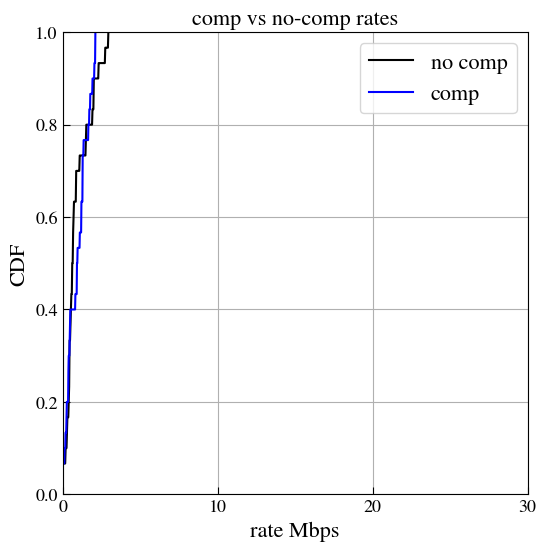

In [34]:
sh.cdf_2(results[29][1]['m1']/1000,'no comp','black',results[29][1]['m2']/1000,'comp','blue','comp vs no-comp rates',0,30,'rate Mbps',100)


no comp
10% Quantil: 393.1994965340752
90% Quantil: 1745.600298252675
50% Quantil (Median): 537.981893781744
no comp TP1
10% Quantil: 527.2570108205296
90% Quantil: 1893.8799417138937
50% Quantil (Median): 743.1525603888103
no comp TP2
10% Quantil: 106.93786570008966
90% Quantil: 2742.5885514574406
50% Quantil (Median): 615.8440443997555
comp user
10% Quantil: 477.93469740451474
90% Quantil: 1056.933468505199
50% Quantil (Median): 664.2494706614859


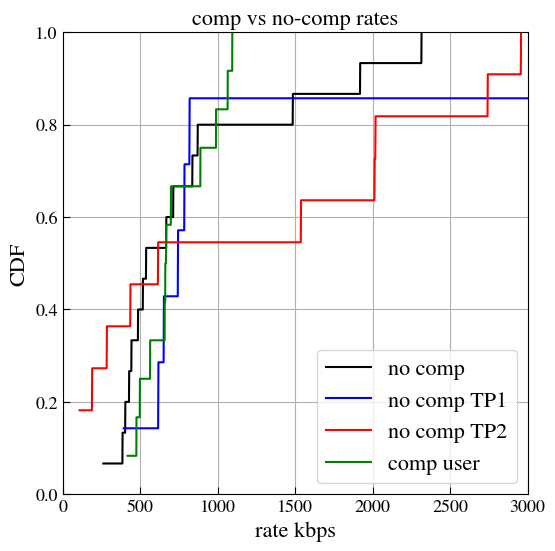

In [35]:
res=15
x=results[res][1]['m2']*(1-results[res][1]['comp'])
x1=x[0:15]
x2=x[15:30]
x1=x1[x1>0]
x2=x2[x2>0]
y=results[res][1]['m2']*(results[res][1]['comp'])
y=y[y>0]
nc=results[res][1]['m1'][0:15]

sh.cdf_4(nc,'no comp','black',x1,'no comp TP1','blue',x2,'no comp TP2','red',y,'comp user','green','comp vs no-comp rates',0,3000,'rate kbps',1500)


no comp
10% Quantil: 393.068342378603
90% Quantil: 1744.879915751958
50% Quantil (Median): 537.498253536453
comp TP1
10% Quantil: 536.8600947818288
90% Quantil: 1370.2986050907175
50% Quantil (Median): 695.8209485350574
comp TP2
10% Quantil: 124.11574572126531
90% Quantil: 2178.125178276731
50% Quantil (Median): 836.7960999992534


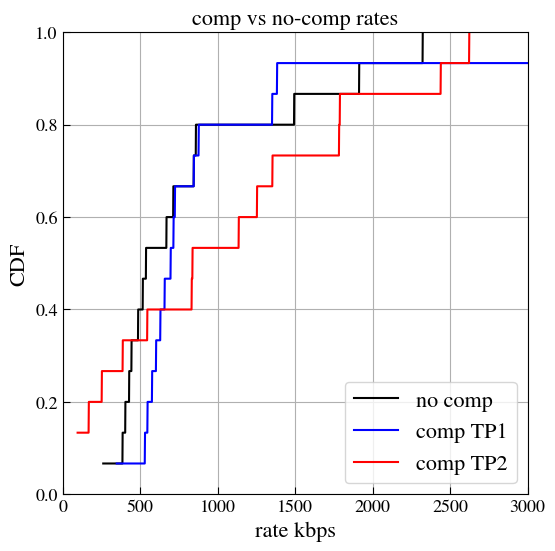

In [36]:
sh.cdf_3(results[19][1]['m1'][0:15],'no comp','black',results[19][1]['m2'][0:15],'comp TP1','blue',results[19][1]['m2'][15:30],'comp TP2','red','comp vs no-comp rates',0,3000,'rate kbps',1500)